In [22]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from googletrans import Translator

In [27]:
#read in scraped and archived data and combine
scraped_data = pd.read_csv('recent-nyt-first-said-data.csv', index_col=0)
print("scraped length: ", len(scraped_data))
archived_data = pd.read_json('nyt_first_said.json')
print("archived length: ", len(archived_data))
data = pd.concat([scraped_data, archived_data])
print("combined length: ", len(data))

#drop duplicates from scraping
data.drop_duplicates(subset=["full_text"], inplace=True)
print("no duplicates length: ", len(data))

data.head()

scraped length:  1100
archived length:  4586
combined length:  5686
no duplicates length:  5662


,id,full_text,favorite_count,retweet_count,created_at
0,1.318931e+18,punkify,203,44,2020-10-21 15:01:57
1,1.318885e+18,amiante,11,0,2020-10-21 12:01:52
2,1.318613e+18,pentalogue,10,0,2020-10-20 18:01:58
3,1.318613e+18,apocalypst,60,5,2020-10-20 18:01:52
4,1.318485e+18,casedemic,13,2,2020-10-20 09:33:31


In [28]:
##cut out tweets longer than 1 word
len_mask = [len(s) > 1 for s in data["full_text"].str.split()]
len_mask_index = data[len_mask].index
data.drop(labels=len_mask_index, inplace=True)

In [29]:
#create column for date (year-month-day)
date = [pd.to_datetime(t).date() for t in data["created_at"]]
data.insert(4, "date", date)

In [30]:
#create column for hour
hours = [pd.to_datetime(t).time().hour for t in data["created_at"]]
data.insert(5, "hour", hours)

In [31]:
time = [pd.to_datetime(t).time() for t in data["created_at"]]
data.insert(6, "time", time)

In [32]:
#create column for length of word
word_lens = [len(w) for w in data["full_text"]]
data.insert(2, "word_len", word_lens)

In [33]:
data.head()

,id,full_text,word_len,favorite_count,retweet_count,date,hour,time,created_at
0,1.318931e+18,punkify,7,203,44,2020-10-21,15,15:01:57,2020-10-21 15:01:57
1,1.318885e+18,amiante,7,11,0,2020-10-21,12,12:01:52,2020-10-21 12:01:52
2,1.318613e+18,pentalogue,10,10,0,2020-10-20,18,18:01:58,2020-10-20 18:01:58
3,1.318613e+18,apocalypst,10,60,5,2020-10-20,18,18:01:52,2020-10-20 18:01:52
4,1.318485e+18,casedemic,9,13,2,2020-10-20,9,09:33:31,2020-10-20 09:33:31


In [34]:
data.to_csv('nnyt-data-v1.csv')


In [35]:
day_counts = []
for day in data["date"].unique():
    day_counts.append(len(data.loc[data["date"] == day]))

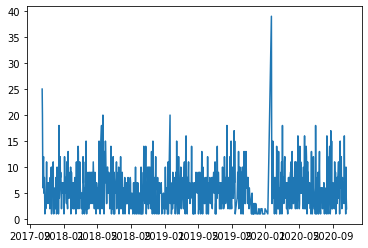

In [36]:
plt.plot(data["date"].unique(), day_counts)

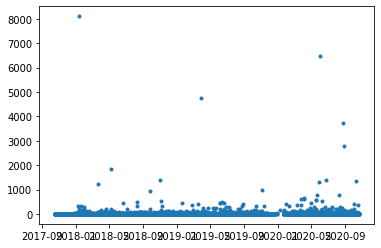

In [37]:
plt.plot(data["date"], data["retweet_count"], ".")

In [38]:
translator = Translator()
data.insert(7, "detected_language", ['en' for i in range(len(data))])
data.insert(8, "language_confidence", [0 for i in range(len(data))])

In [58]:
last_i = 0
translator = Translator()
for i, row in data.iterrows():
    if i > last_i:
        this_trans = translator.detect(row["full_text"])
        #write translation info into dataframe
        data.loc[i, "detected_language"] = this_trans.lang
        data.loc[i, "language_confidence"] = this_trans.confidence
        last_i = i

data.head()

,id,full_text,word_len,favorite_count,retweet_count,date,created_at,detected_language,language_confidence
0,1.318931e+18,punkify,7,203,44,2020-10-21,2020-10-21 15:01:57,en,0.622221
1,1.318885e+18,amiante,7,11,0,2020-10-21,2020-10-21 12:01:52,fr,1.000000
2,1.318613e+18,pentalogue,10,10,0,2020-10-20,2020-10-20 18:01:58,el,0.234515
3,1.318613e+18,apocalypst,10,60,5,2020-10-20,2020-10-20 18:01:52,en,0.675675
4,1.318485e+18,casedemic,9,13,2,2020-10-20,2020-10-20 09:33:31,ro,0.627875


In [61]:
data.to_csv('new-compiled-nyt-first-words.csv')

In [60]:
len(data)

5662